# Alphalens Example Tear Sheet

Alphalens is designed to aid in the analysis of "alpha factors," data transformations that are used to predict future price movements of financial instruments. Alpha factors take the form of a single value for each asset on each day. The dimension of these values is not necessarily important. We evaluate an alpha factor by considering daily factor values relative to one another. 

It is important to note the difference between an alpha factor and a trading algorithm. A trading algorithm uses an alpha factor, or combination of alpha factors to generate trades.  Trading algorithms cover execution and risk constraints: the business of turning predictions into profits. Alpha factors, on the other hand, are focused soley on making predictions. This difference in scope lends itself to a difference in the methodologies used to evaluate alpha factors and trading algorithms. Alphalens does not contain analyses of things like transaction costs, capacity, or portfolio construction. Those interested in more implementation specific analyses are encouaged to check out pyfolio (https://github.com/quantopian/pyfolio), a library specifically geared towards the evaluation of trading algorithms. 





In [9]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
ticker_sector = {'A': 4, 'AA': 7, 'AAL': 5, 'AAP': 0, 'AAPL': 6, 'ABBV': 4, 'ABC': 4, 'ABT': 4, 'ACN': 6, 'ADBE': 6, 
'ADI': 6, 'ADM': 1, 'ADP': 6, 'ADS': 6, 'ADSK': 6, 'AEE': 9, 'AEP': 9, 'AES': 9, 'AET': 4, 'AFL': 3, 
'AGN': 4, 'AIG': 3, 'AIV': 3, 'AIZ': 3, 'AJG': 3, 'AKAM': 6, 'ALK': 5, 'ALL': 3, 'ALLE': 5, 'ALXN': 4,
'AMAT': 6, 'AME': 5, 'AMG': 3, 'AMGN': 4, 'AMP': 3, 'AMT': 3, 'AMZN': 0, 'AN': 0, 'ANTM': 4, 'AON': 3,
'APA': 2, 'APC': 2, 'APD': 7, 'APH': 5, 'ATVI': 6, 'AVB': 3, 'AVGO': 6, 'AVY': 7, 'AWK': 9, 'AXP': 3,
'AYI': 5, 'AZO': 0, 'BA': 5, 'BAC': 3, 'BAX': 4, 'BBBY': 0, 'BBT': 3, 'BBY': 0, 'BCR': 4, 'BDX': 4,
'BEN': 3, 'BF-B': 1, 'BHI': 2, 'BIIB': 4, 'BK': 3, 'BLK': 3, 'BLL': 7, 'BMY': 4, 'BRK-B': 3, 'BSX': 4,
'BWA': 0, 'BXP': 3, 'C': 3, 'CA': 6, 'CAG': 1, 'CAH': 4, 'CAT': 5, 'CB': 3, 'CBG': 3, 'CBS': 0, 
'CCI': 3, 'CCL': 0, 'CELG': 4, 'CERN': 4, 'CF': 7, 'CFG': 3, 'CHD': 1, 'CHK': 2, 'CHRW': 5, 'CI': 4,
'CINF': 3, 'CL': 1, 'CLX': 1, 'CMA': 3, 'CMCSA': 0, 'CME': 3, 'CMG': 0, 'CMI': 5, 'CMS': 9, 'CNC': 4,
'CNP': 9, 'COF': 3, 'COG': 2, 'COH': 0, 'COL': 5, 'COP': 2, 'COST': 1, 'CPB': 1, 'CPGX': 2, 'CRM': 6,
'CSCO': 6, 'CSRA': 6, 'CSX': 5, 'CTAS': 5, 'CTL': 8, 'CTSH': 6, 'CTXS': 6, 'CVS': 1, 'CVX': 2, 
'CXO': 2, 'D': 9, 'DAL': 5, 'DD': 7, 'DE': 5, 'DFS': 3, 'DG': 0, 'DGX': 4, 'DHI': 0, 'DHR': 5, 
'DIS': 0, 'DISCA': 0, 'DISCK': 0, 'DLPH': 0, 'DLR': 3, 'DLTR': 0, 'DNB': 5, 'DO': 2, 'DOV': 5, 
'DOW': 7, 'DPS': 1, 'DRI': 0, 'DTE': 9, 'DUK': 9, 'DVA': 4, 'DVN': 2, 'EA': 6, 'EBAY': 6, 'ECL': 7,
'ED': 9, 'EFX': 3, 'EIX': 9, 'EL': 1, 'EMC': 6, 'EMN': 7, 'EMR': 5, 'ENDP': 4, 'EOG': 2, 'EQIX': 6,
'EQR': 3, 'EQT': 2, 'ES': 9, 'ESRX': 4, 'ESS': 3, 'ETFC': 3, 'ETN': 5, 'ETR': 9, 'EW': 4, 'EXC': 9,
'EXPD': 5, 'EXPE': 0, 'EXR': 3, 'F': 0, 'FAST': 5, 'FB': 6, 'FBHS': 5, 'FCX': 7, 'FDX': 5, 'FE': 9, 
'FFIV': 6, 'FIS': 6, 'FISV': 6, 'FITB': 3, 'FL': 0, 'FLIR': 5, 'FLR': 5, 'FLS': 5, 'FMC': 7, 
'FOX': 0, 'FOXA': 0, 'FRT': 3, 'FSLR': 6, 'FTI': 2, 'FTR': 8, 'GAS': 9, 'GD': 5, 'GE': 5, 'GGP': 3,
'GILD': 4, 'GIS': 1, 'GLW': 5, 'GM': 0, 'GOOG': 6, 'GOOGL': 6, 'GPC': 0, 'GPN': 6, 'GPS': 0, 
'GRMN': 0, 'GS': 3, 'GT': 0, 'GWW': 5, 'HAL': 2, 'HAR': 0, 'HAS': 0, 'HBAN': 3, 'HBI': 0, 'HCA': 4,
'HCN': 3, 'HCP': 3, 'HD': 0, 'HES': 2, 'HIG': 3, 'HOG': 0, 'HOLX': 4, 'HON': 5, 'HOT': 0, 'HP': 2,
'HPE': 6, 'HPQ': 6, 'HRB': 3, 'HRL': 1, 'HRS': 6, 'HSIC': 4, 'HST': 3, 'HSY': 1, 'HUM': 4, 'IBM': 6,
'ICE': 3, 'IFF': 7, 'ILMN': 4, 'INTC': 6, 'INTU': 6, 'IP': 7, 'IPG': 0, 'IR': 5, 'IRM': 5, 
'ISRG': 4, 'ITW': 5, 'IVZ': 3, 'JBHT': 5, 'JCI': 0, 'JEC': 5, 'JNJ': 4, 'JNPR': 6, 'JPM': 3, 
'JWN': 0, 'K': 1, 'KEY': 3, 'KHC': 1, 'KIM': 3, 'KLAC': 6, 'KMB': 1, 'KMI': 2, 'KMX': 0, 'KO': 1,
'KORS': 0, 'KR': 1, 'KSS': 0, 'KSU': 5, 'L': 3, 'LB': 0, 'LEG': 5, 'LEN': 0, 'LH': 4, 'LKQ': 0, 
'LLL': 5, 'LLTC': 6, 'LLY': 4, 'LM': 3, 'LMT': 5, 'LNC': 3, 'LOW': 0, 'LRCX': 6, 'LUK': 3, 'LUV': 5,
'LVLT': 8, 'LYB': 7, 'M': 0, 'MA': 6, 'MAC': 3, 'MAR': 0, 'MAS': 5, 'MAT': 0, 'MCD': 0, 'MCHP': 6, 
'MCK': 4, 'MCO': 3, 'MDLZ': 1, 'MDT': 4, 'MET': 3, 'MHK': 0, 'MJN': 1, 'MKC': 1, 'MLM': 7, 'MMC': 3, 
'MMM': 5, 'MNK': 4, 'MNST': 1, 'MO': 1, 'MON': 7, 'MOS': 7, 'MPC': 2, 'MRK': 4, 'MRO': 2, 'MS': 3, 
'MSFT': 6, 'MSI': 6, 'MTB': 3, 'MU': 6, 'MUR': 2, 'MYL': 4, 'NAVI': 3, 'NBL': 2, 'NDAQ': 3, 'NEE': 9,
'NEM': 7, 'NFLX': 6, 'NFX': 2, 'NI': 9, 'NKE': 0, 'NLSN': 5, 'NOC': 5, 'NOV': 2, 'NRG': 9, 'NSC': 5, 
'NTAP': 6, 'NTRS': 3, 'NUE': 7, 'NVDA': 6, 'NWL': 0, 'NWS': 0, 'NWSA': 0, 'O': 3, 'OI': 7, 'OKE': 2, 
'OMC': 0, 'ORCL': 6, 'ORLY': 0, 'OXY': 2, 'PAYX': 6, 'PBCT': 3, 'PBI': 5, 'PCAR': 5, 'PCG': 9, 'PCLN': 0, 
'PDCO': 4, 'PEG': 9, 'PEP': 1, 'PFE': 4, 'PFG': 3, 'PG': 1, 'PGR': 3, 'PH': 5, 
'PHM': 0, 'PKI': 4, 'PLD': 3, 'PM': 1, 'PNC': 3, 'PNR': 5, 'PNW': 9, 'PPG': 7, 
'PPL': 9, 'PRGO': 4, 'PRU': 3, 'PSA': 3, 'PSX': 2, 'PVH': 0, 'PWR': 5, 'PX': 7, 'PXD': 2, 
'PYPL': 6, 'QCOM': 6, 'QRVO': 6, 'R': 5, 'RAI': 1, 'RCL': 0, 'REGN': 4, 'RF': 3, 'RHI': 5, 'RHT': 6, 
'RIG': 2, 'RL': 0, 'ROK': 5, 'ROP': 5, 'ROST': 0, 'RRC': 2, 'RSG': 5, 'RTN': 5, 'SBUX': 0, 'SCG': 9,
'SCHW': 3, 'SE': 2, 'SEE': 7, 'SHW': 7, 'SIG': 0, 'SJM': 1, 'SLB': 2, 'SLG': 3, 'SNA': 0, 'SNI': 0,
'SO': 9, 'SPG': 3, 'SPGI': 3, 'SPLS': 0, 'SRCL': 5, 'SRE': 9, 'STI': 3, 'STJ': 4, 'STT': 3, 'STX': 6,
'STZ': 1, 'SWK': 0, 'SWKS': 6, 'SWN': 2, 'SYF': 3, 'SYK': 4, 'SYMC': 6, 'SYY': 1, 'T': 8, 'TAP': 1,
'TDC': 6, 'TDG': 5, 'TE': 9, 'TEL': 6, 'TGNA': 0, 'TGT': 0, 'TIF': 0, 'TJX': 0, 'TMK': 3, 'TMO': 4,
'TRIP': 0, 'TROW': 3, 'TRV': 3, 'TSCO': 0, 'TSN': 1, 'TSO': 2, 'TSS': 6, 'TWX': 0, 'TXN': 6, 'TXT': 5,
'TYC': 5, 'UA': 0, 'UAL': 5, 'UDR': 3, 'UHS': 4, 'ULTA': 0, 'UNH': 4, 'UNM': 3, 'UNP': 5, 'UPS': 5,
'URBN': 0, 'URI': 5, 'USB': 3, 'UTX': 5, 'V': 6, 'VAR': 4, 'VFC': 0, 'VIAB': 0, 'VLO': 2, 'VMC': 7, 
'VNO': 3, 'VRSK': 5, 'VRSN': 6, 'VRTX': 4, 'VTR': 3, 'VZ': 8, 'WAT': 4, 'WBA': 1, 'WDC': 6, 'WEC': 9,
'WFC': 3, 'WFM': 1, 'WHR': 0, 'WLTW': 3, 'WM': 5, 'WMB': 2, 'WMT': 1, 'WRK': 7, 'WU': 6, 'WY': 3, 
'WYN': 0, 'WYNN': 0, 'XEC': 2, 'XEL': 9, 'XL': 3, 'XLNX': 6, 'XOM': 2, 'XRAY': 4, 'XRX': 6, 'XYL': 5,
 'YHOO': 6, 'YUM': 0, 'ZBH': 4, 'ZION': 3, 'ZTS': 4}

In [12]:
import pandas_datareader.data as web
pan = web.DataReader(list(ticker_sector.keys()), "google", '2014-12-01')

In [13]:
pan = pan.transpose(2,1,0)

For demonstration purposes we will create a predictive factor. To cheat we will look at future prices to make sure we'll rank high stoks that will perform well and vice versa.

In [14]:
lookahead_bias_days = 5

predictive_factor = pan.loc[:,:,'Open']
predictive_factor = predictive_factor.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()
predictive_factor.index = predictive_factor.index.set_names(['date', 'asset'])

In [15]:
predictive_factor.head()

date        asset
2016-11-16  GE       0.029364
            PM      -0.023377
2016-11-17  GE       0.037520
            NEM     -0.087755
            PM      -0.031024
dtype: float64

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestats will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, before the trading starts every day, we observe yesterday factor values. The price we pass to alphalens is the next available price after that factor observation: the daily open price that will be used as assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument). The retuns computed by Alphalens will therefore based on  assets open prices.

In [16]:
pricing = pan.loc[:,:,'Open'].iloc[1:]
pricing.head()

A     AA    AAL     AAP    AAPL   ABBV    ABC  ABT     ACN  \
Date                                                                         
2016-11-17  46.16   31.3  44.39  163.44  109.81  61.75   78.2  NaN   117.5   
2016-11-18  45.91  31.73  46.15  166.12  109.72  61.65  79.91  NaN  118.25   
2016-11-21  45.22  30.89  46.46  162.75  110.12   60.7  78.62  NaN   118.7   
2016-11-22  44.94   31.1  46.03  167.63  111.95  60.49  78.77  NaN  119.92   
2016-11-23  44.18     31  46.05  170.26  111.36  58.81  78.07  NaN  119.36   

              ADBE  ...     XLNX    XOM   XRAY    XRX    XYL   YHOO    YUM  \
Date                ...                                                      
2016-11-17  103.77  ...    53.33  86.44  60.36  38.24  54.73  41.34  60.56   
2016-11-18  106.19  ...     53.2  85.21  60.74  38.28  53.89  41.48  61.83   
2016-11-21  105.56  ...    53.02  86.44  60.14  38.16  53.53  41.44  62.33   
2016-11-22  105.85  ...    53.39  86.69  58.57  38.04  53.49   41.2  62.02   
2016-11-23  105.41  ...    53.34  86.54  59.86  37.28     53  40.91  62.48   

               ZBH   ZION    ZTS  
Date                              
2016-11-17   100.8  37.47  49.08  
2016-11-18  101.04   37.8  49.25  
2016-11-21  100.64  38.49  49.95  
2016-11-22  100.95  38.15  49.85  
2016-11-23  100.19  38.86  49.38  

[5 rows x 504 columns]

Often, we'd want to know how our factor looks across various groupings (sectors, industires, countries, etc.), in this example let's use sectors. To generate sector level breakdowns, you'll need to pass alphalens a sector mapping for each traded name. 

This mapping can come in the form of a MultiIndexed Series (with the same date/symbol index as your factor value) if you want to provide a sector mapping for each symbol on each day. 

If you'd like to use constant sector mappings, you may pass symbol to sector mappings as a dict.

If your sector mappings come in the form of codes (as they do in this tutorial), you may also pass alphalens a dict of sector names to use in place of sector codes.

In [17]:
sector_names = {0: 'Consumer Discretionary',
                1: 'Consumer Staples',
                2: 'Energy',
                3: 'Financials',
                4: 'Health Care',
                5: 'Industrials',
                6: 'Information Technology',
                7: 'Materials',
                8: 'Telecommunications Services',
                9: 'Utilities'}

## Formatting input data

Alphalens contains a handy data formatting function to transform your factor and pricing data into the exact inputs expected by the tear sheet functions.

In [18]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                   pricing, 
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   groupby=ticker_sector,
                                                                   groupby_labels=sector_names)

Dropped 8.0% entries from factor data (8.0% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


In [19]:
factor_data.head()

1         5        10    factor  \
date       asset                                           
2016-11-18 A     -0.015029 -0.025485 -0.057504 -0.025485   
           AA    -0.026473 -0.015443 -0.090451 -0.015443   
           AAL    0.006717  0.004117 -0.001300  0.004117   
           AAP   -0.020287  0.033530  0.026126  0.033530   
           AAPL   0.003646  0.015950 -0.005013  0.015950   

                                   group  factor_quantile  
date       asset                                           
2016-11-18 A                 Health Care              1.0  
           AA                  Materials              1.0  
           AAL               Industrials              2.0  
           AAP    Consumer Discretionary              5.0  
           AAPL   Information Technology              3.0

You'll notice that we've placed all of the information we need for our calculations into one dataframe. Variables are the columns, and observations are each row.

The integer columns represents the forward returns or the daily price change for the N days after a timestamp. The 1 day forward return for AAPL on 2014-12-2 is the percent change in the AAPL open price on 2014-12-2 and the AAPL open price on 2014-12-3. The 5 day forward return is the percent change from open 2014-12-2 to open 2014-12-9 (5 trading days) divided by 5.

# Returns Analysis

Returns analysis gives us a raw description of a factor's value that shows us the power of a factor in real currency values.

One of the most basic ways to look at a factor's predicitve power is to look at the mean return of different factor quantile. 

In [20]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

In [21]:
mean_return_by_q_daily.head()

1         5         10
factor_quantile date                                    
1.0             2016-11-18 -0.013703 -0.036511 -0.047922
                2016-11-21 -0.010922 -0.029650 -0.032392
                2016-11-22 -0.015390 -0.036788 -0.009333
                2016-11-24 -0.005739 -0.037637 -0.033572
                2016-11-25 -0.003564 -0.046708 -0.035422

In [22]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_group=False)

In [23]:
mean_return_by_q.head()

1         5         10
factor_quantile                              
1.0             -0.008408 -0.039204 -0.039058
2.0             -0.002339 -0.010650 -0.010368
3.0              0.000176  0.000746  0.001096
4.0              0.002579  0.011717  0.011722
5.0              0.008007  0.037462  0.036682

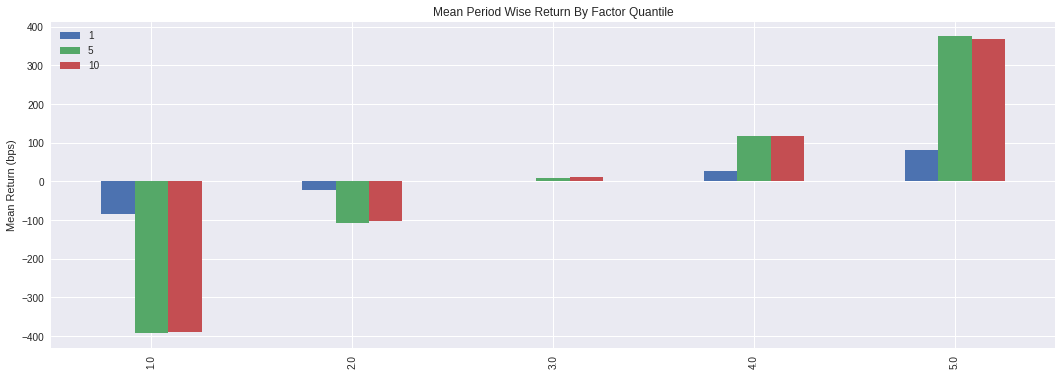

In [24]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q);

By looking at the mean return by quantile we can get a real look at how well the factor differentiates forward returns across the signal values. Obviously we want securities with a better signal to exhibit higher returns. For a good factor we'd expect to see negative values in the lower quartiles and positive values in the upper quantiles.

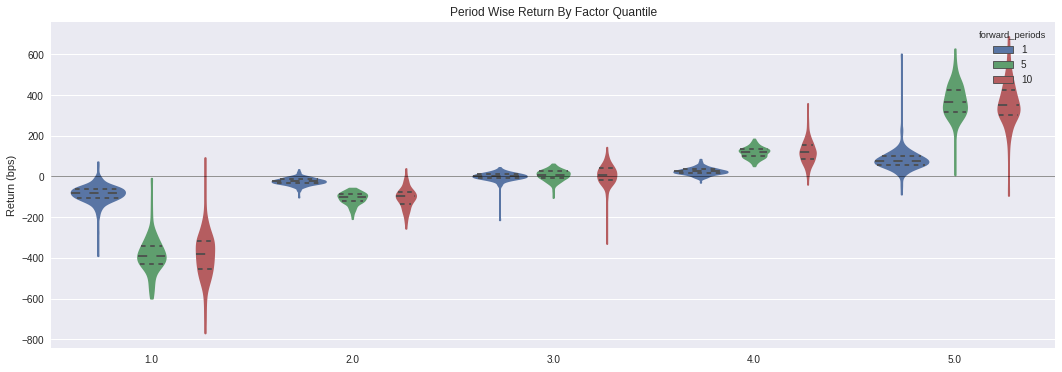

In [25]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily);

This violin plot is similar to the one before it but shows more information about the underlying data. It gives a better idea about the range of values, the median, and the inter-quartile range. What gives the plots their shape is the application of a probability density of the data at different values.

In [26]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily,
                                                                                        upper_quant=5,
                                                                                        lower_quant=1,
                                                                                        std_err=std_err)

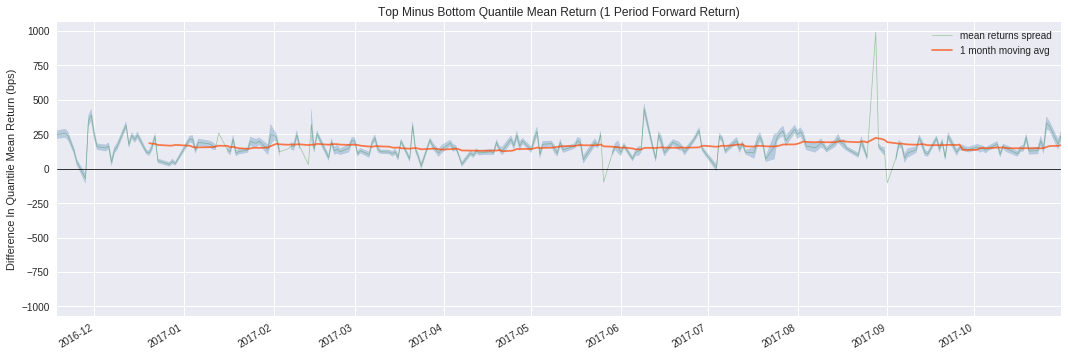

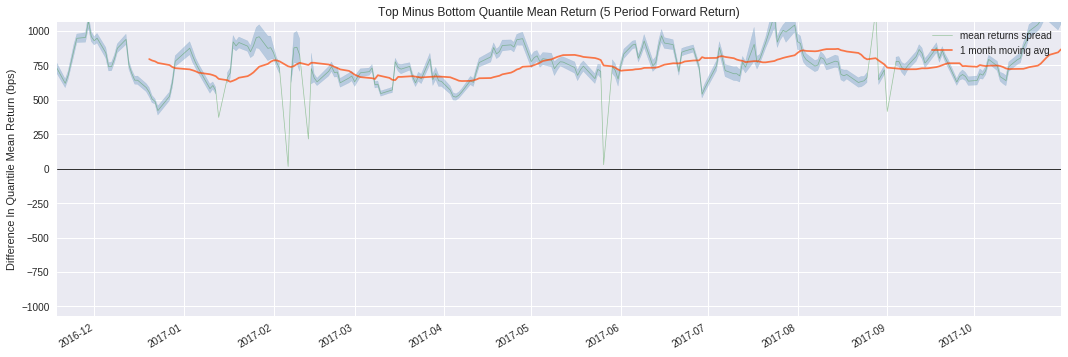

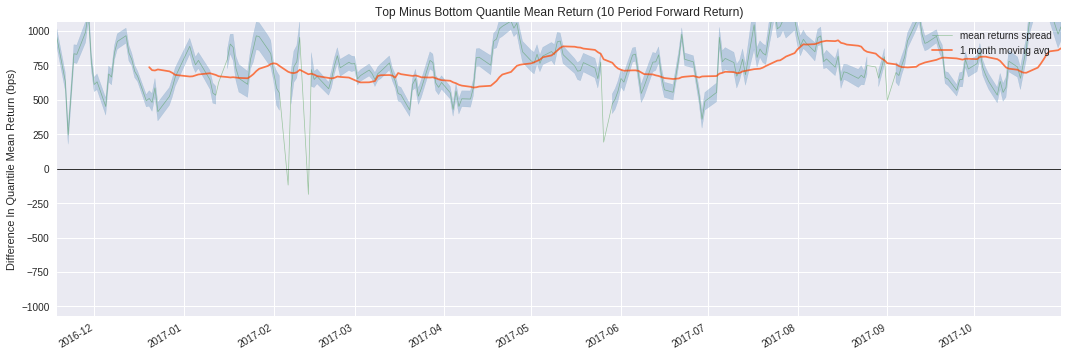

In [27]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(quant_return_spread, std_err_spread);

This rolling forward returns spread graph allows us to look at the raw spread in basis points between the top and bottom quantiles over time. The green line is the returns spread while the orange line is a 1 month average to smooth the data and make it easier to visualize.

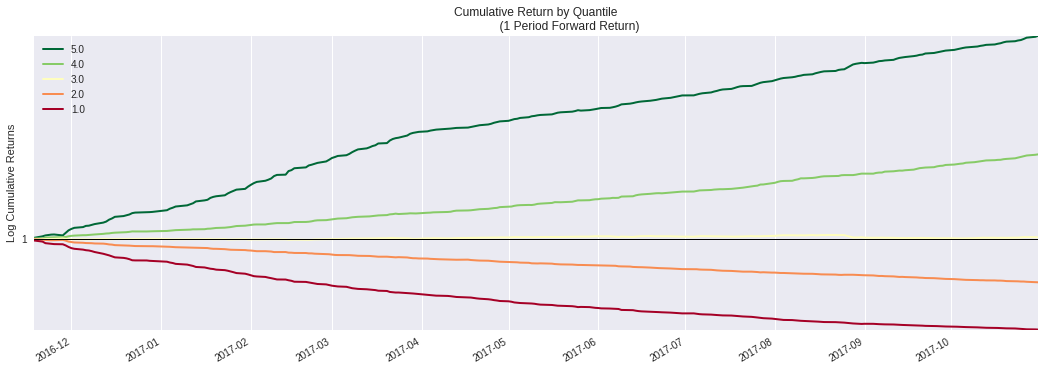

In [28]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily);

By looking at the cumulative returns by factor quantile we can get an intuition for which quantiles are contributing the most to the factor and at what time. Ideally we would like to see a these curves originate at the same value on the left and spread out like a fan as they move to the right through time, with the higher quantiles on the top.

In [29]:
ls_factor_returns = alphalens.performance.factor_returns(factor_data)

In [30]:
ls_factor_returns.head()

1         5         10
date                                    
2016-11-18  0.014606  0.043431  0.050741
2016-11-21  0.015876  0.035985  0.035583
2016-11-22  0.014624  0.037624  0.012154
2016-11-24  0.006117  0.049076  0.046499
2016-11-25  0.002357  0.045588  0.041803

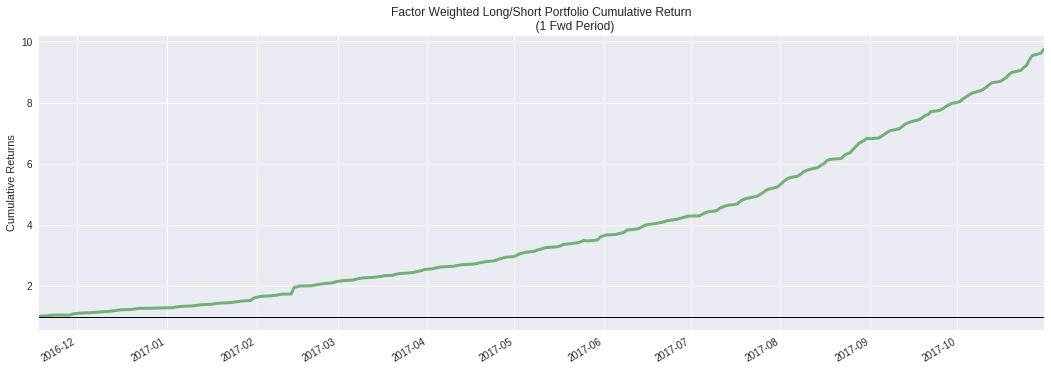

In [31]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns[1]);

While looking at quantiles is important we must also look at the factor returns as a whole. The cumulative factor long/short returns plot lets us view the combined effects overtime of our entire factor.

In [32]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor_data)

In [33]:
alpha_beta

1         5         10
Ann. alpha  10.215978  8.217574  2.064181
beta         0.224743  0.232689  0.003837

A very important part of factor returns analysis is determing the alpha, and how significant it is. Here we surface the annualized alpha, and beta.

## Returns Tear Sheet

We can view all returns analysis calculations together.

Returns Analysis


1        5       10
Ann. alpha                                      10.216    8.218   2.064
beta                                             0.225    0.233   0.004
Mean Period Wise Return Top Quantile (bps)      80.074   73.827  36.090
Mean Period Wise Return Bottom Quantile (bps)  -84.084  -79.668 -39.762
Mean Period Wise Spread (bps)                  165.123  151.935  75.050

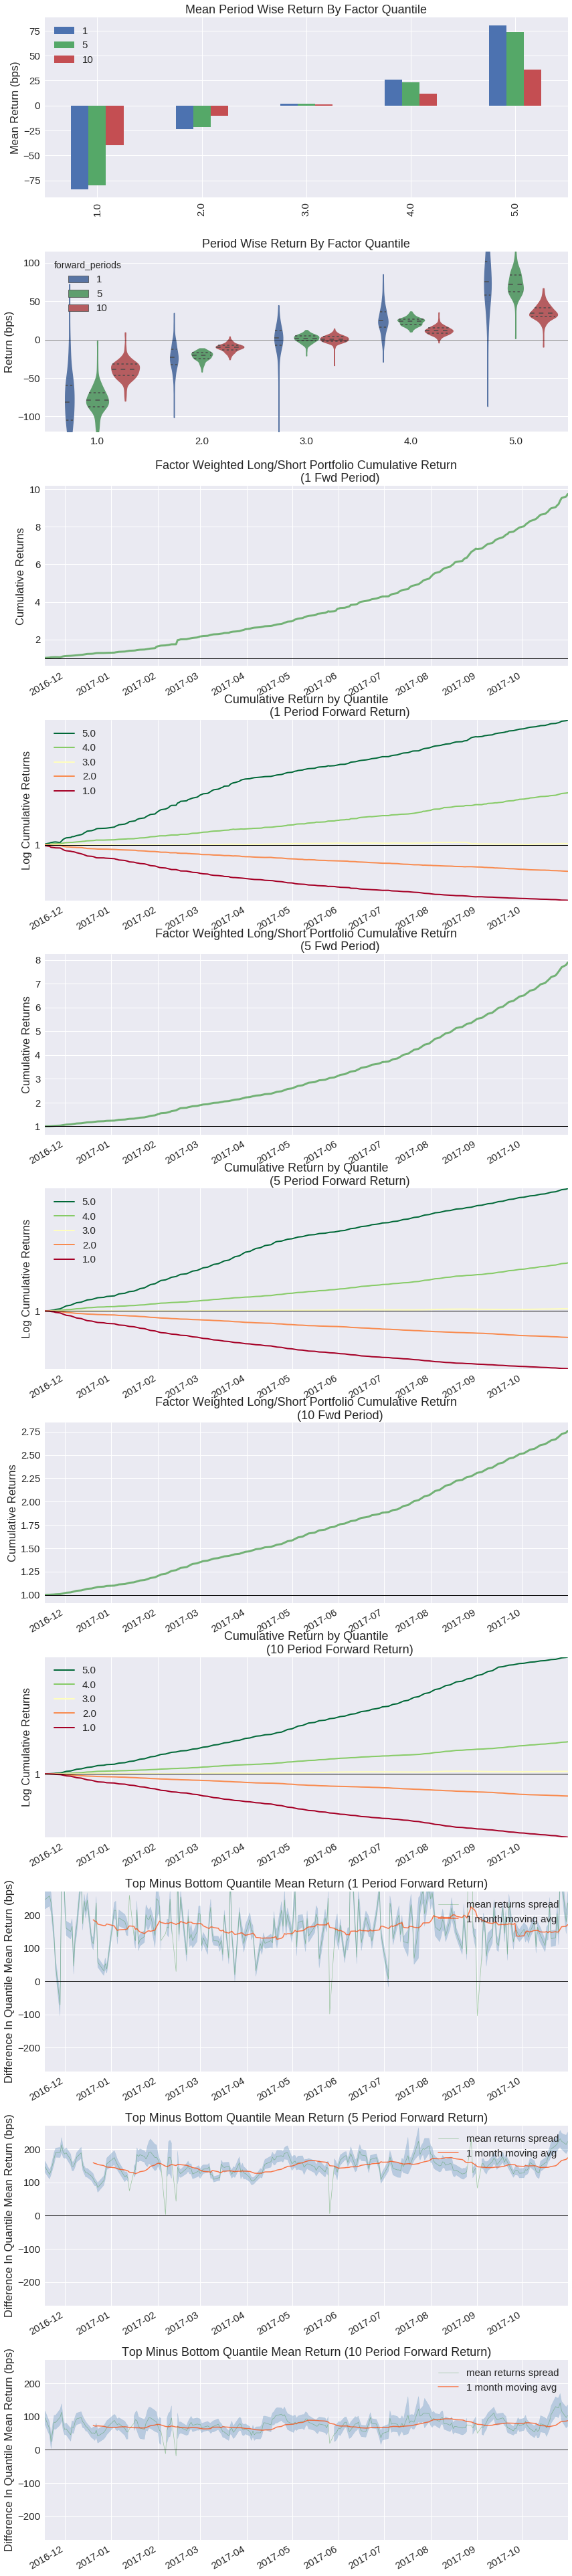

In [34]:
alphalens.tears.create_returns_tear_sheet(factor_data)

# Information Analysis

Information Analysis is a way for us to evaluate the predicitive value of a factor without the confounding effects of transaction costs. The main way we look at this is through the Information Coefficient (IC).

From Wikipedia...

>The information coefficient (IC) is a measure of the merit of a predicted value. In finance, the information coefficient is used as a performance metric for the predictive skill of a financial analyst. The information coefficient is similar to correlation in that it can be seen to measure the linear relationship between two random variables, e.g. predicted stock returns and the actualized returns. The information coefficient ranges from 0 to 1, with 0 denoting no linear relationship between predictions and actual values (poor forecasting skills) and 1 denoting a perfect linear relationship (good forecasting skills).

In [35]:
ic = alphalens.performance.factor_information_coefficient(factor_data)

In [36]:
ic.head()

1    5         10
date                               
2016-11-18  0.567126  1.0  0.680930
2016-11-21  0.603495  1.0  0.474085
2016-11-22  0.532810  1.0  0.262568
2016-11-24  0.392997  1.0  0.627045
2016-11-25  0.107664  1.0  0.647894

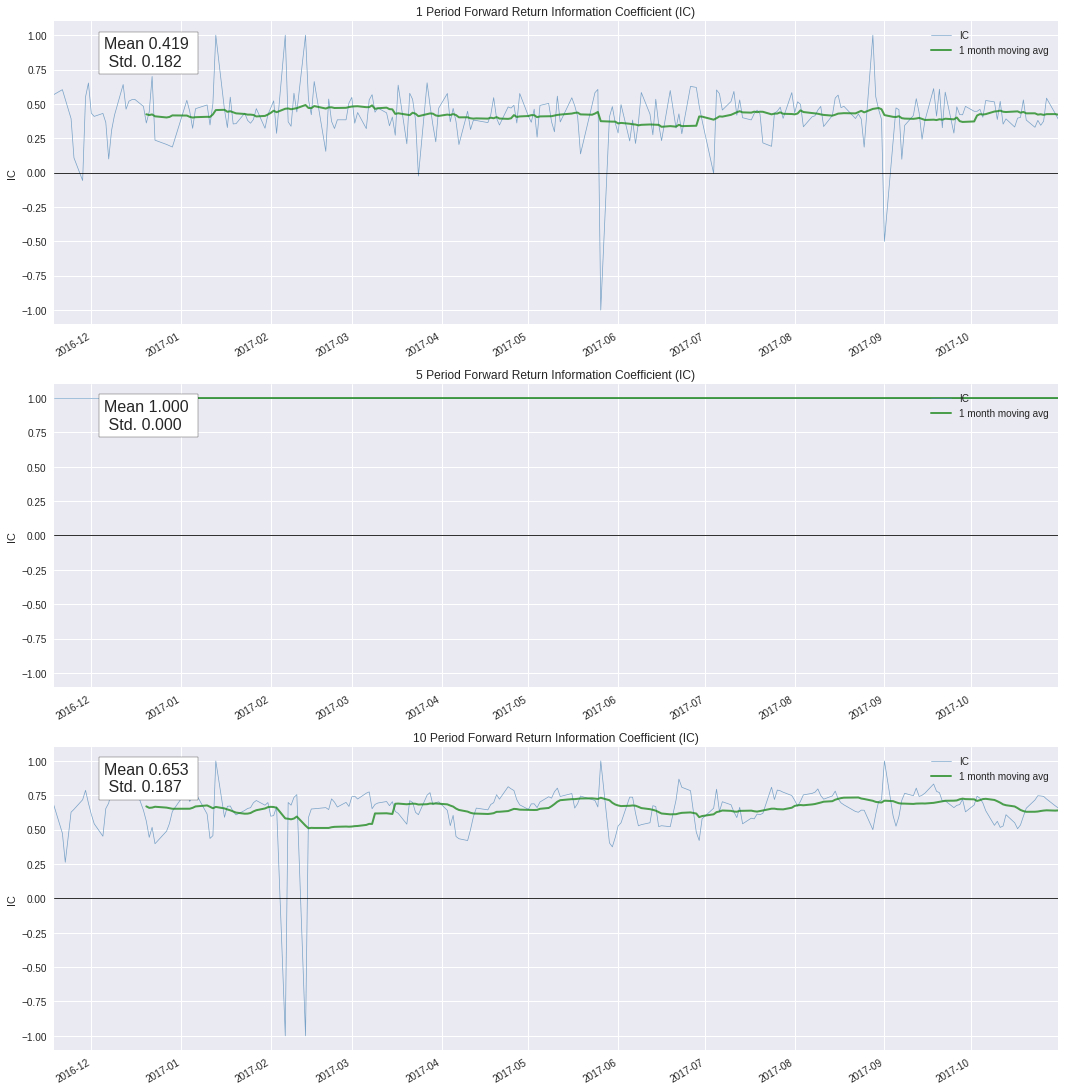

In [37]:
alphalens.plotting.plot_ic_ts(ic);

By looking at the IC each day we can understand how theoretically predicitive our factor is overtime. We like our mean IC to be high and the standard deviation, or volatility of it, to be low. We want to find consistently predictive factors.

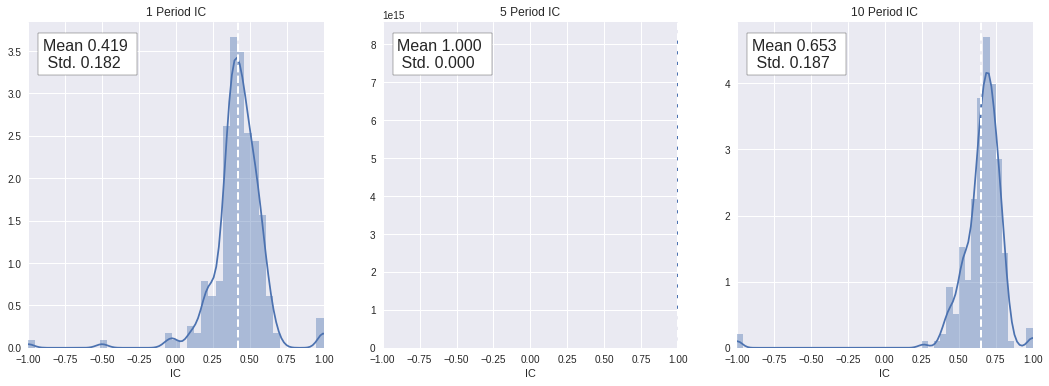

In [38]:
alphalens.plotting.plot_ic_hist(ic);

Looking at a histogram of the daily IC values can indicate how the factor behaves most of the time, where the likely IC values will fall, it also allows us to see if the factor has fat tails.

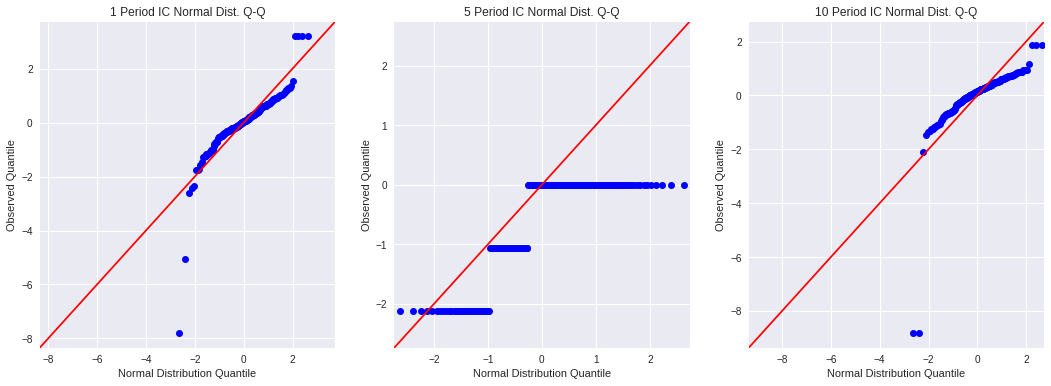

In [39]:
alphalens.plotting.plot_ic_qq(ic);

These Q-Q plots show the difference in shape between the distribution of IC values and a normal distribution. This is especially helpful in seeing how the most extreme values in the distribution affect the predicitive power.

In [40]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')

In [41]:
mean_monthly_ic.head()

1    5         10
date                               
2016-11-30  0.418657  1.0  0.611099
2016-12-31  0.397712  1.0  0.643095
2017-01-31  0.445737  1.0  0.671005
2017-02-28  0.488420  1.0  0.493913
2017-03-31  0.418283  1.0  0.690970

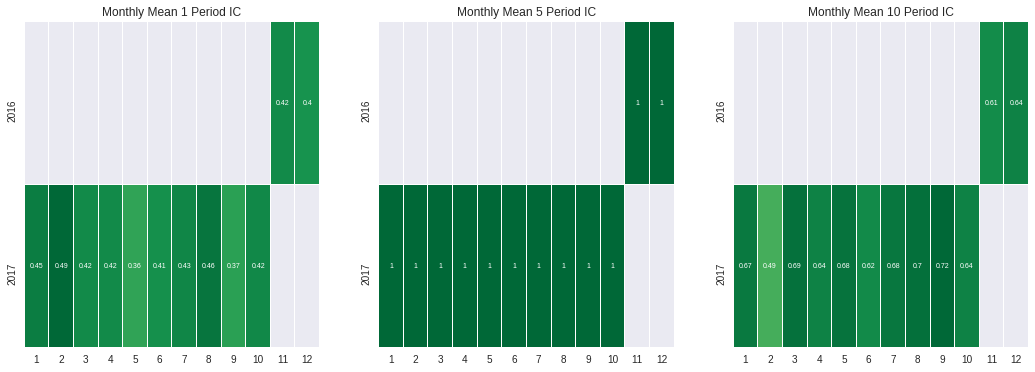

In [42]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic);

By displaying the IC data in heatmap format we can get an idea about the consistency of the factor, and how it behaves during different market regimes/seasons.

## Information Tear Sheet

We can view all information analysis calculations together.

Information Analysis


1             5       10
IC Mean            0.419  1.000000e+00   0.653
IC Std.            0.182  0.000000e+00   0.187
Risk-Adjusted IC   2.297  9.507975e+15   3.483
t-stat(IC)        35.218  1.457545e+17  53.386
p-value(IC)        0.000  0.000000e+00   0.000
IC Skew           -2.252 -1.844000e+00  -5.877
IC Kurtosis       18.210  6.130000e-01  49.353

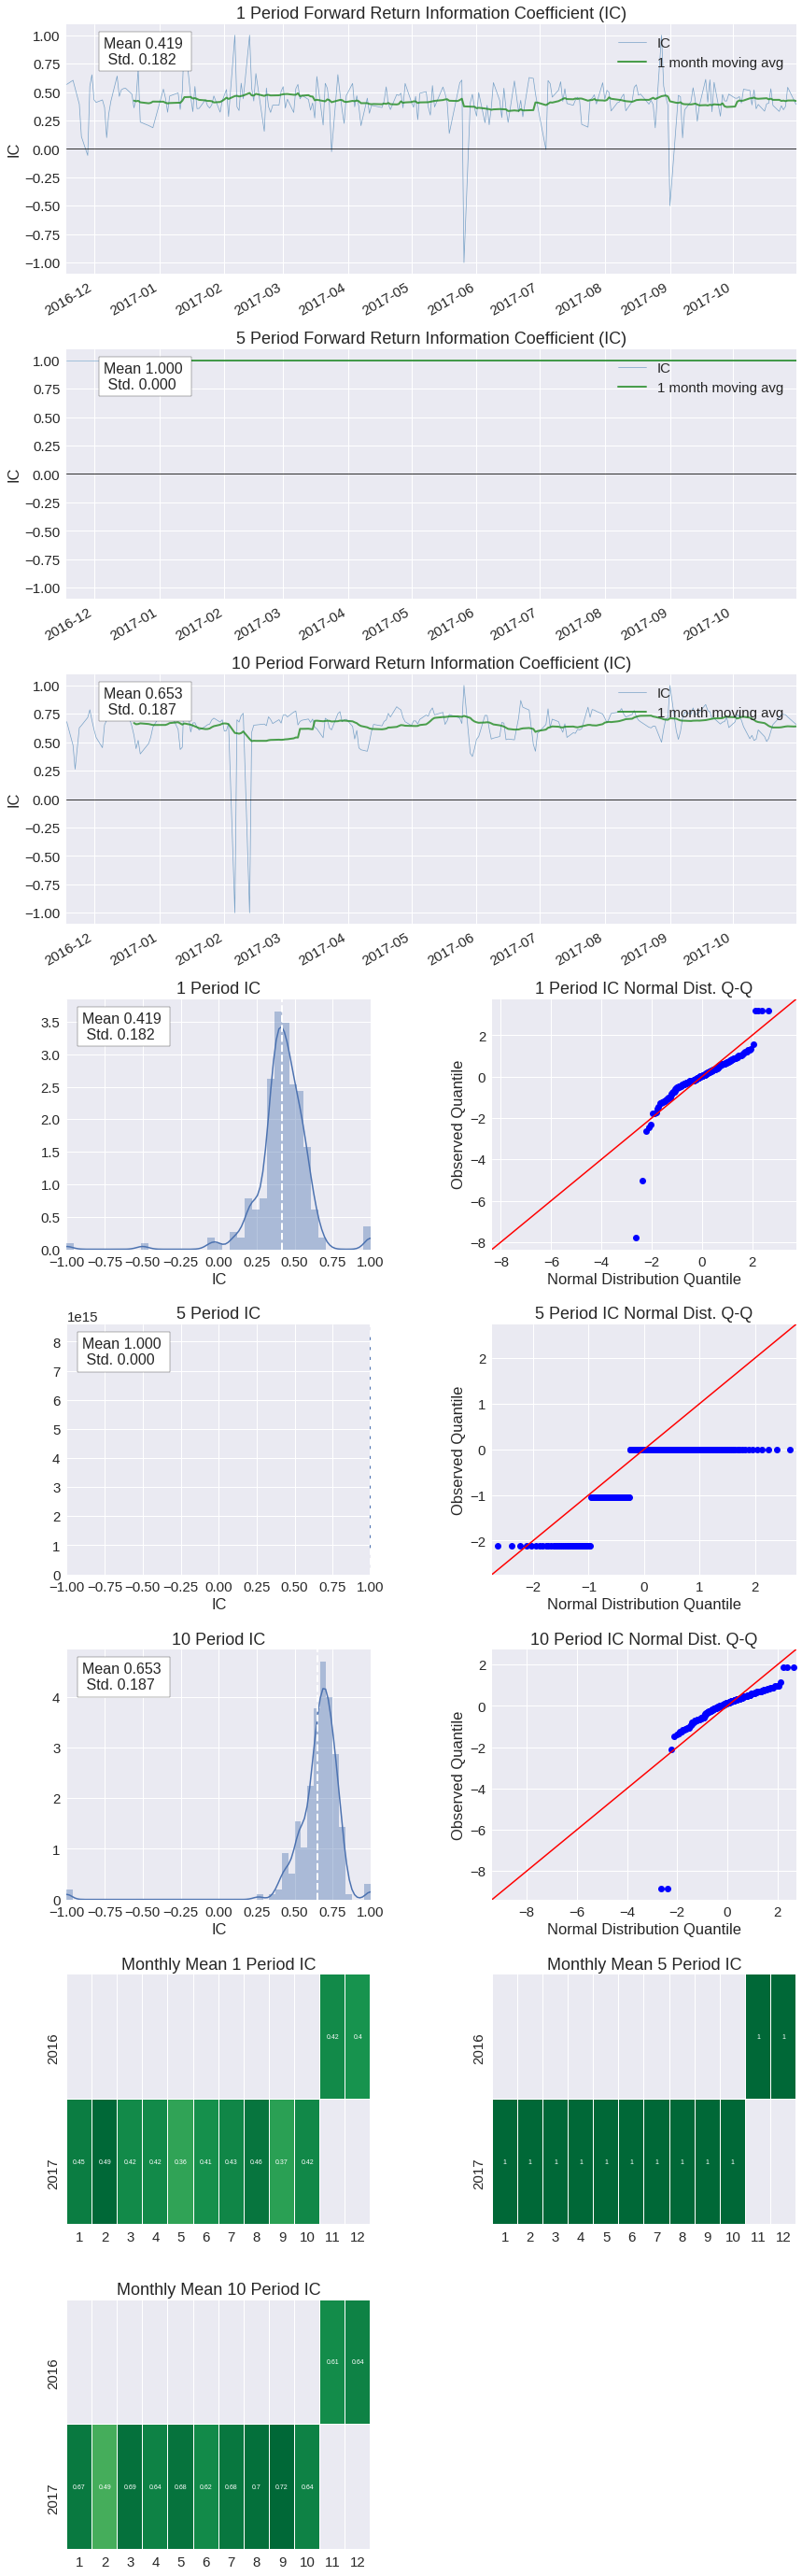

In [43]:
alphalens.tears.create_information_tear_sheet(factor_data)

# Turnover Analysis

Turnover Analysis gives us an idea about the nature of a factor's makeup and how it changes.

In [44]:
quantile_factor = factor_data['factor_quantile']
turnover_period = 1

In [47]:
quantile_turnover = pd.concat([alphalens.performance.quantile_turnover(quantile_factor, q, turnover_period)
                               for q in range(1, int(quantile_factor.max()) + 1)], axis=1)

In [48]:
quantile_turnover.head()

1         2         3         4         5
date                                                        
2016-11-18       NaN       NaN       NaN       NaN       NaN
2016-11-21  0.411111  0.617978  0.674157  0.685393  0.388889
2016-11-22  0.466667  0.606742  0.730337  0.617978  0.522222
2016-11-24  0.677778  0.775281  0.786517  0.741573  0.719101
2016-11-25  0.433333  0.719101  0.707865  0.573034  0.333333

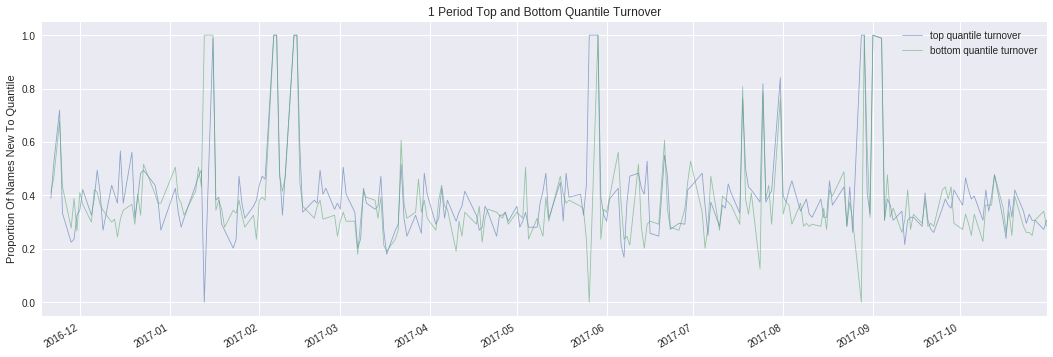

In [49]:
alphalens.plotting.plot_top_bottom_quantile_turnover(quantile_turnover, turnover_period)

Factor turnover is important as it indicates the incorporation of new information and the make up of the extremes of a signal. By looking at the new additions to the sets of top and bottom quantiles we can see how much of this factor is getting remade everyday.

In [50]:
factor_autocorrelation = alphalens.performance.factor_rank_autocorrelation(factor_data, turnover_period)

In [51]:
factor_autocorrelation.head()

date
2016-11-18         NaN
2016-11-21    0.641791
2016-11-22    0.539700
2016-11-24    0.097377
2016-11-25    0.729299
Name: 1, dtype: float64

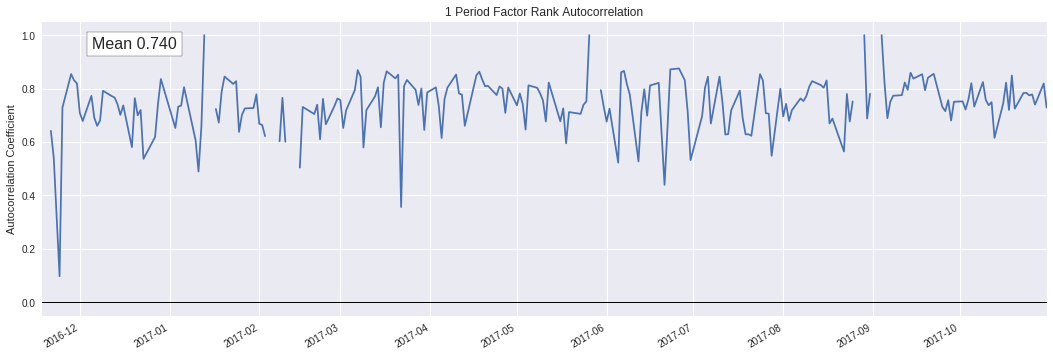

In [52]:
alphalens.plotting.plot_factor_rank_auto_correlation(factor_autocorrelation);

The autocorrelation of the factor indicates to us the persistence of the signal itself.

## Turnover Tear Sheet

We can view all turnover calculations together.

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.376  0.775  0.765
Quantile 2 Mean Turnover   0.611  0.802  0.799
Quantile 3 Mean Turnover   0.651  0.780  0.787
Quantile 4 Mean Turnover   0.613  0.787  0.792
Quantile 5 Mean Turnover   0.400  0.804  0.793

1      5     10
Mean Factor Rank Autocorrelation  0.74 -0.018  0.001

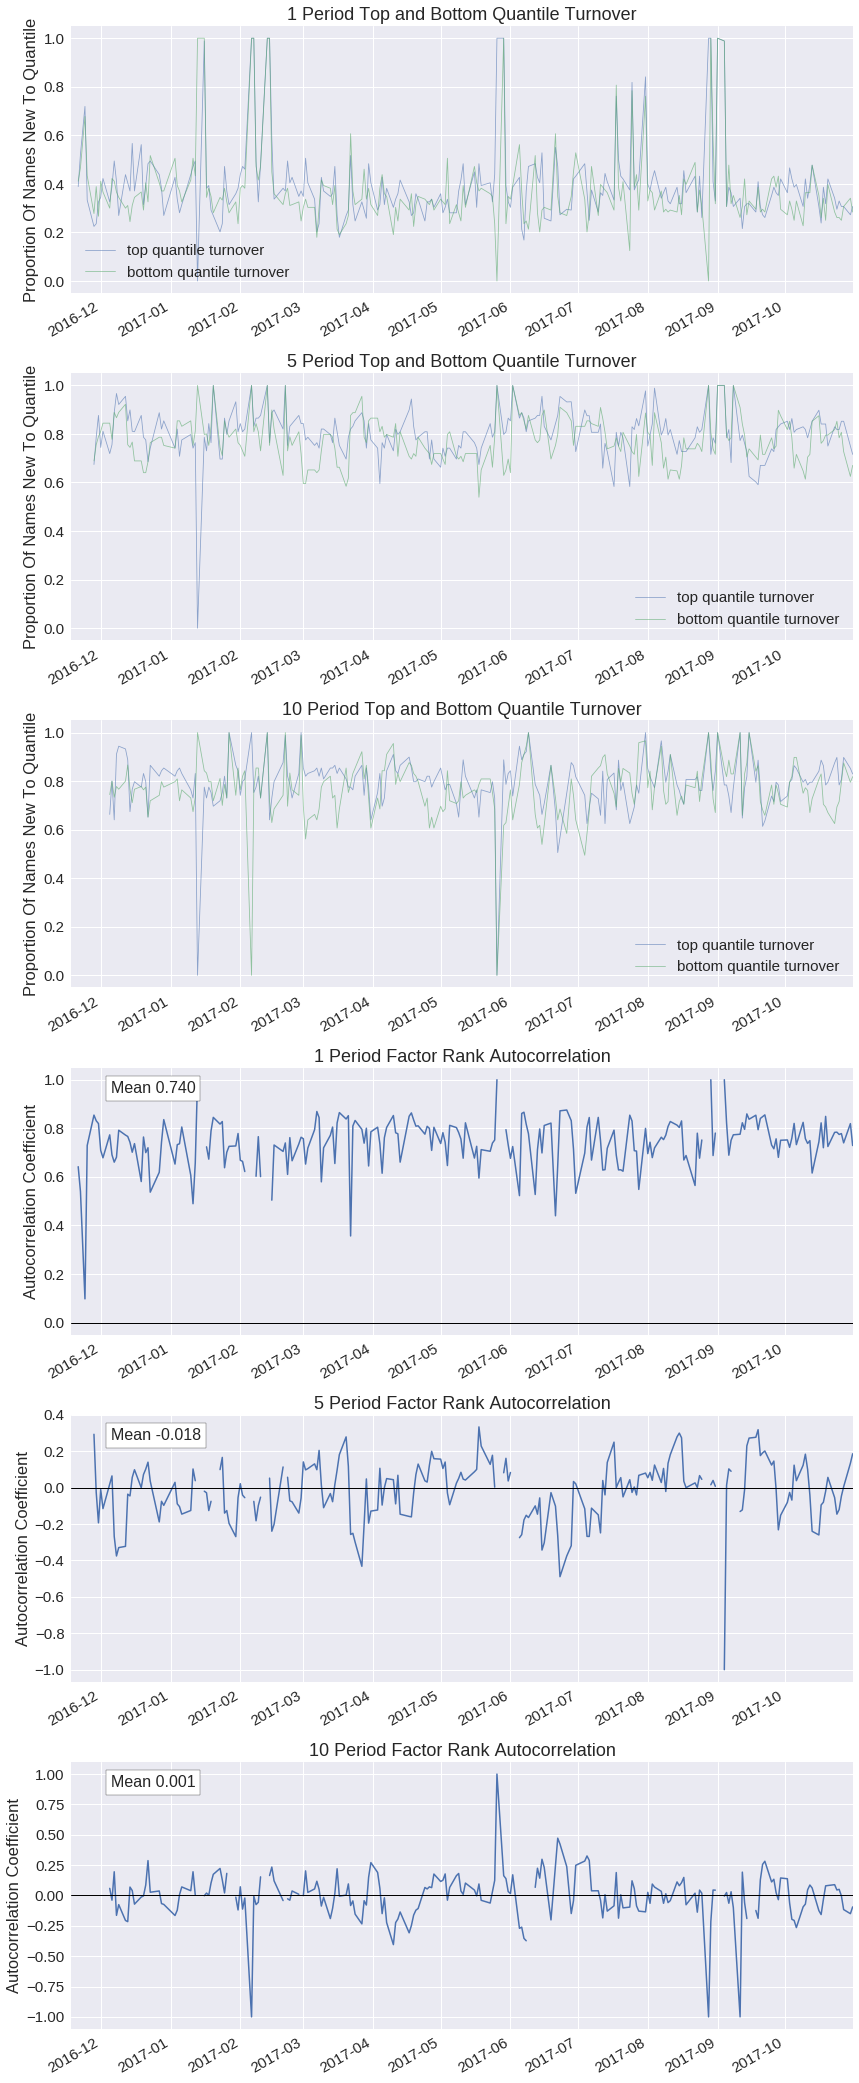

In [53]:
alphalens.tears.create_turnover_tear_sheet(factor_data)

# Event Style Returns Analysis

Looking at the average cumulative return in a window before and after a factor can indicate to us how long the predicative power of a factor lasts. This tear sheet takes a while to run.

**NOTE:** This tear sheet takes in an extra argument `pricing`.

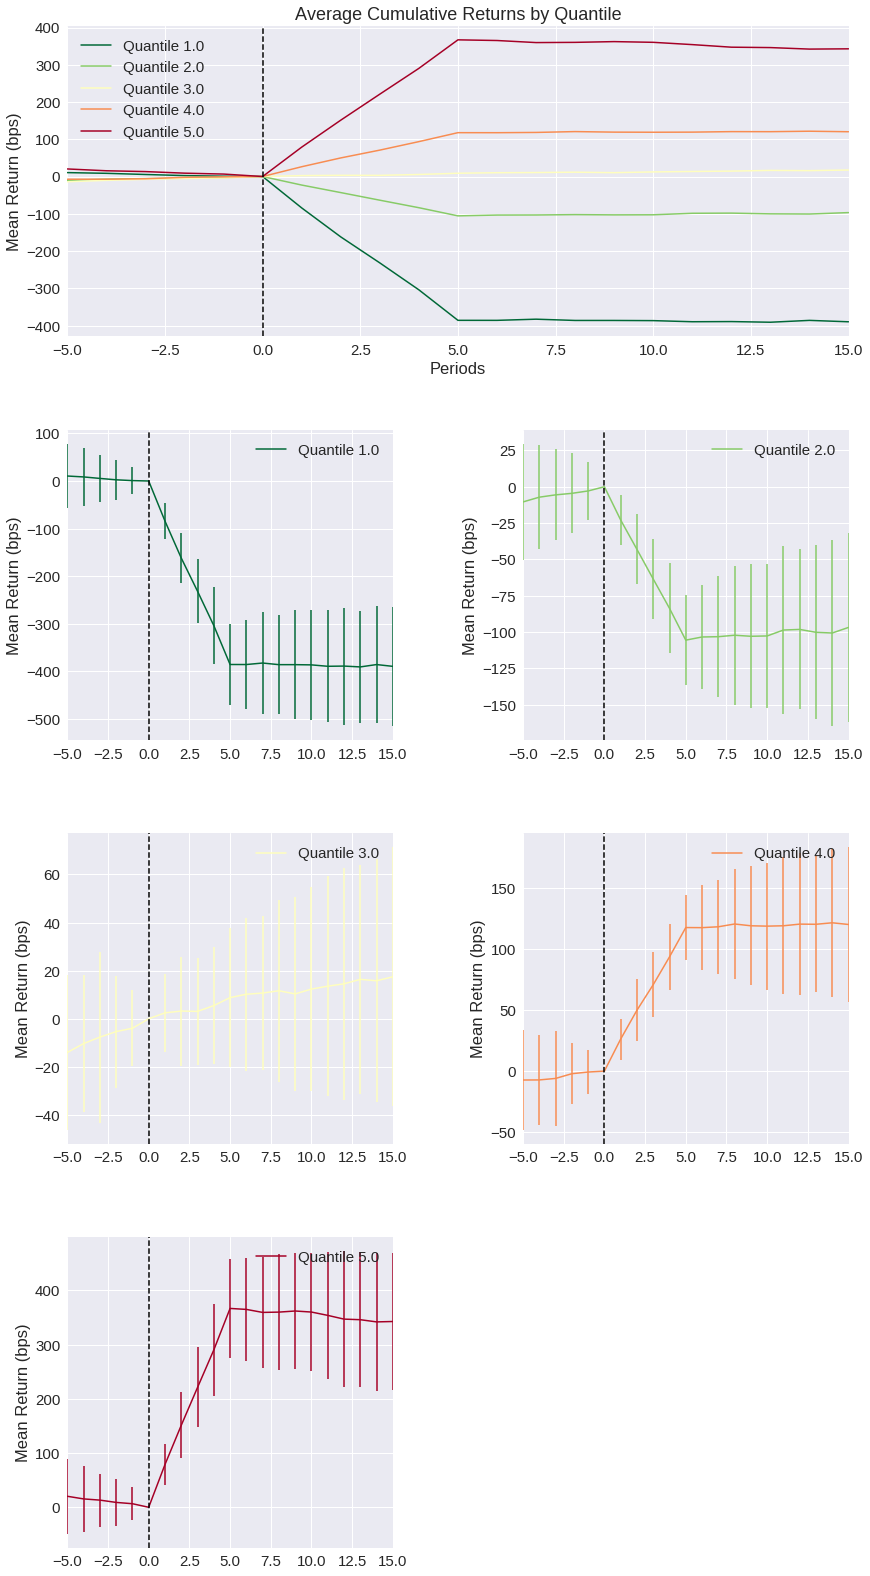

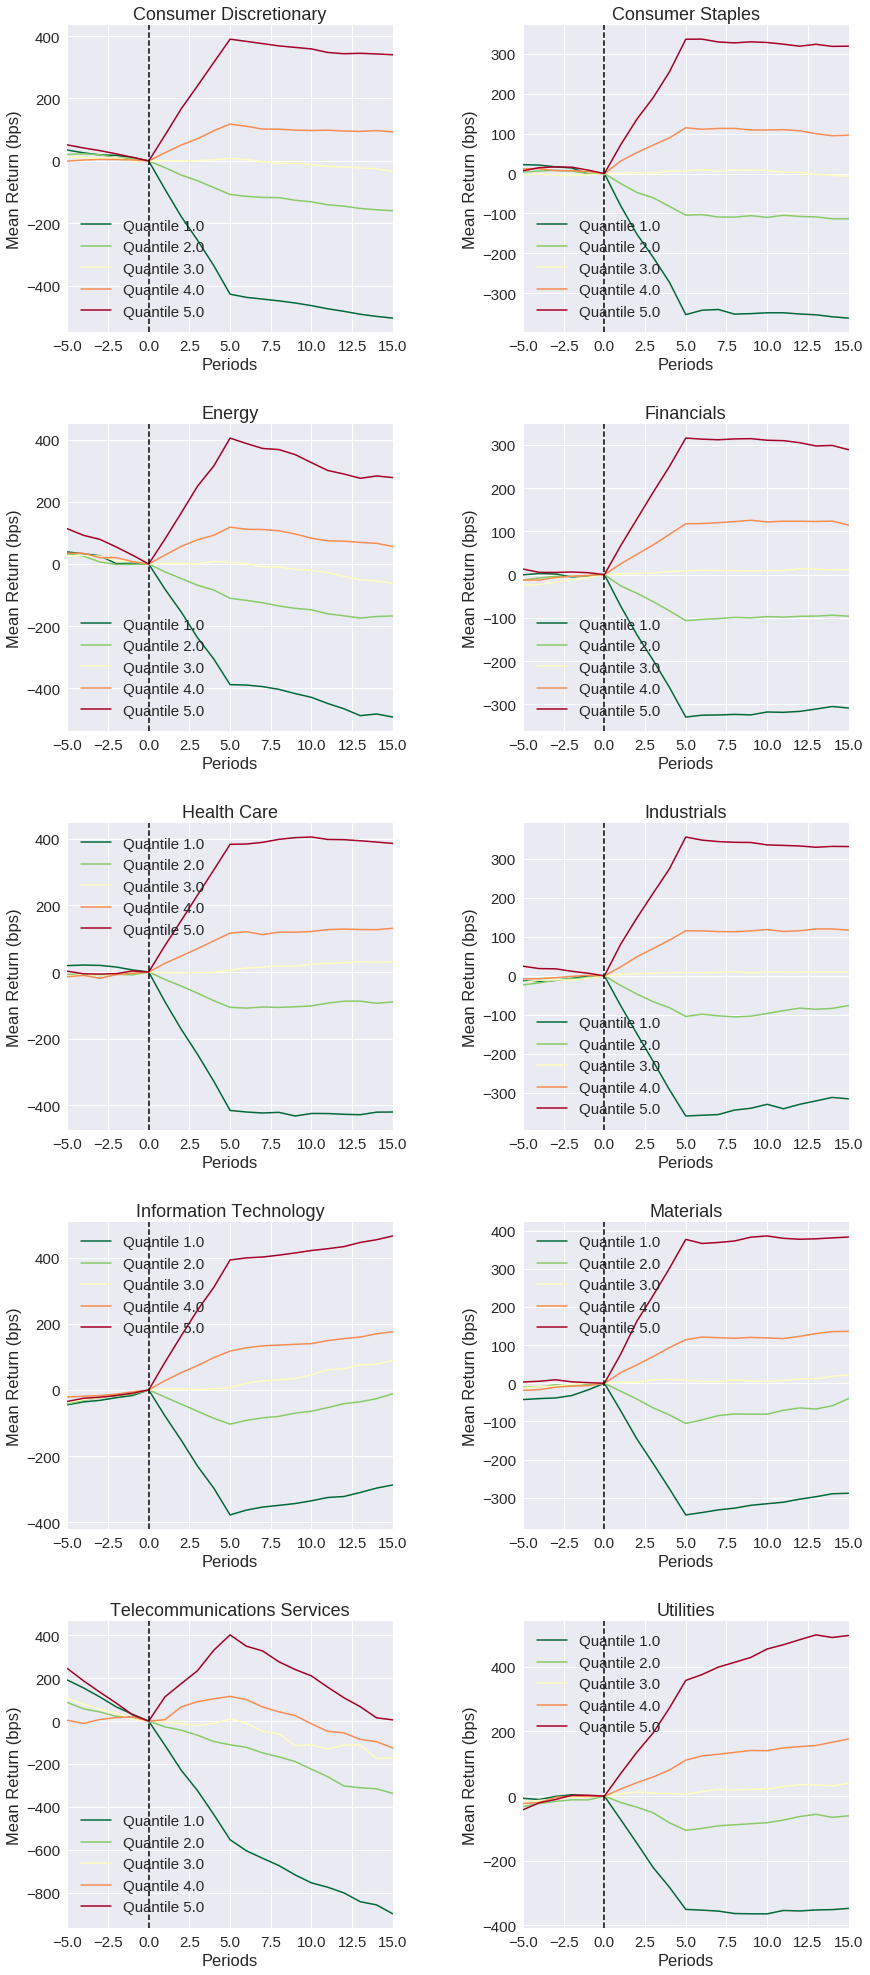

In [54]:
alphalens.tears.create_event_returns_tear_sheet(factor_data, pricing, by_group=True)

# Groupwise

Many of the plots in Alphalens can be viewed on their own by grouping if grouping information is provided. The returns and information tear sheets can be viewed groupwise by passing in the `by_group=True` argument.

In [55]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor_data, by_group=True)

In [56]:
ic_by_sector.head()

1    5         10
group                                          
Consumer Discretionary  0.415060  1.0  0.662579
Consumer Staples        0.401038  1.0  0.644549
Energy                  0.406235  1.0  0.642604
Financials              0.412298  1.0  0.645509
Health Care             0.409261  1.0  0.658603

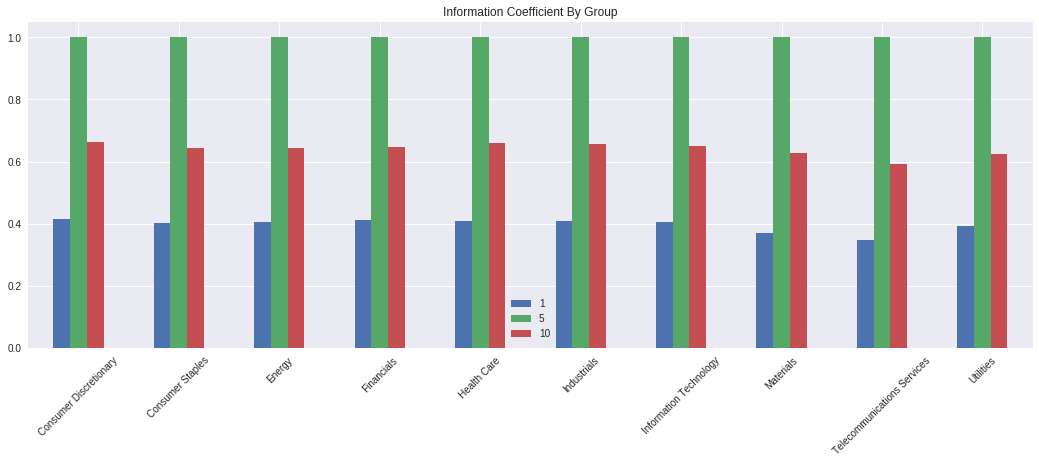

In [57]:
alphalens.plotting.plot_ic_by_group(ic_by_sector);

In [58]:
mean_return_quantile_sector, mean_return_quantile_sector_err = alphalens.performance.mean_return_by_quantile(factor_data, by_group=True)

In [59]:
mean_return_quantile_sector.head()

1         5         10
factor_quantile group                                               
1.0             Consumer Discretionary -0.009132 -0.043858 -0.046817
                Consumer Staples       -0.007945 -0.035793 -0.036491
                Energy                 -0.009628 -0.043211 -0.045622
                Financials             -0.007078 -0.032770 -0.031355
                Health Care            -0.009279 -0.043019 -0.043190

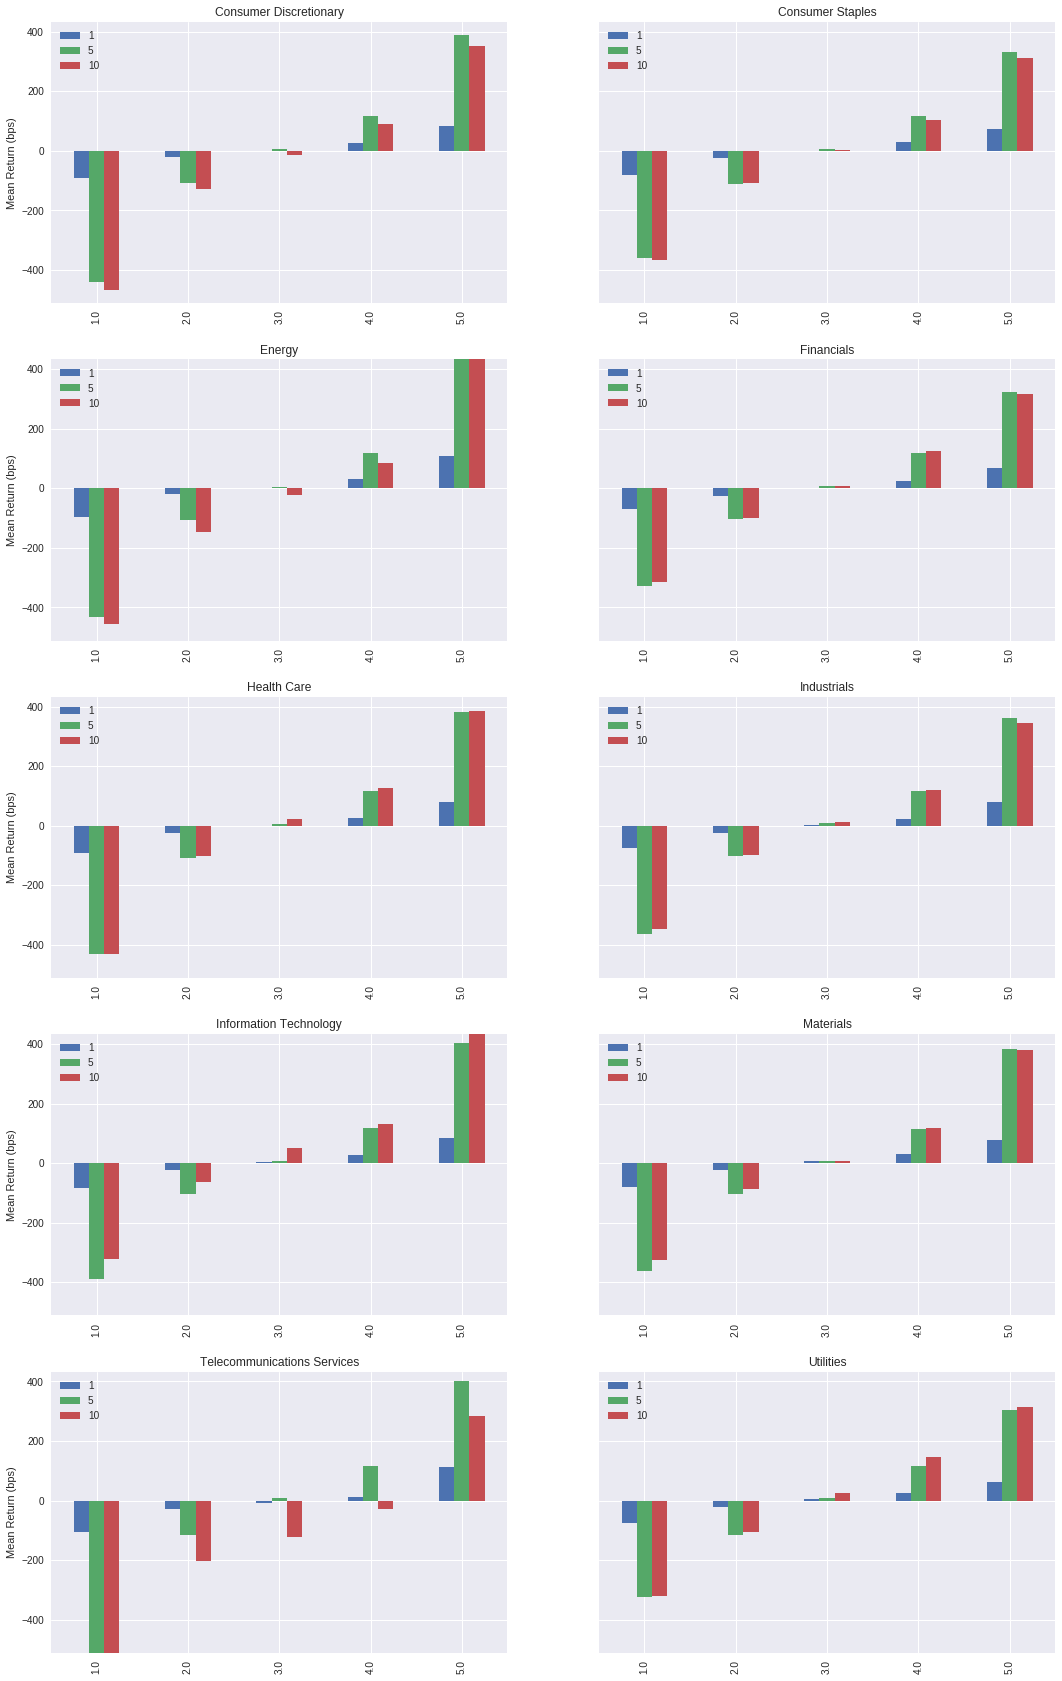

In [60]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_group=True);

# Summary Tear Sheet

There are a lot of plots above. If you want a quick snapshot of how the alpha factor performs consider the summary tear sheet.

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1.0             -0.411371  0.014925 -0.036896  0.029091  20147  20.086740
2.0             -0.042042  0.023551 -0.008346  0.009758  20004  19.944167
3.0             -0.028777  0.037272  0.003054  0.009076  20031  19.971087
4.0             -0.015974  0.056112  0.014022  0.009921  20002  19.942173
5.0             -0.006261  1.068796  0.039773  0.031170  20116  20.055833

Returns Analysis


1        5       10
Ann. alpha                                      10.216    8.218   2.064
beta                                             0.225    0.233   0.004
Mean Period Wise Return Top Quantile (bps)      80.074   73.827  36.090
Mean Period Wise Return Bottom Quantile (bps)  -84.084  -79.668 -39.762
Mean Period Wise Spread (bps)                  165.123  151.935  75.050

Information Analysis


1             5       10
IC Mean            0.419  1.000000e+00   0.653
IC Std.            0.182  0.000000e+00   0.187
Risk-Adjusted IC   2.297  9.507975e+15   3.483
t-stat(IC)        35.218  1.457545e+17  53.386
p-value(IC)        0.000  0.000000e+00   0.000
IC Skew           -2.252 -1.844000e+00  -5.877
IC Kurtosis       18.210  6.130000e-01  49.353

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.376  0.775  0.765
Quantile 2 Mean Turnover   0.611  0.802  0.799
Quantile 3 Mean Turnover   0.651  0.780  0.787
Quantile 4 Mean Turnover   0.613  0.787  0.792
Quantile 5 Mean Turnover   0.400  0.804  0.793

1      5     10
Mean Factor Rank Autocorrelation  0.74 -0.018  0.001

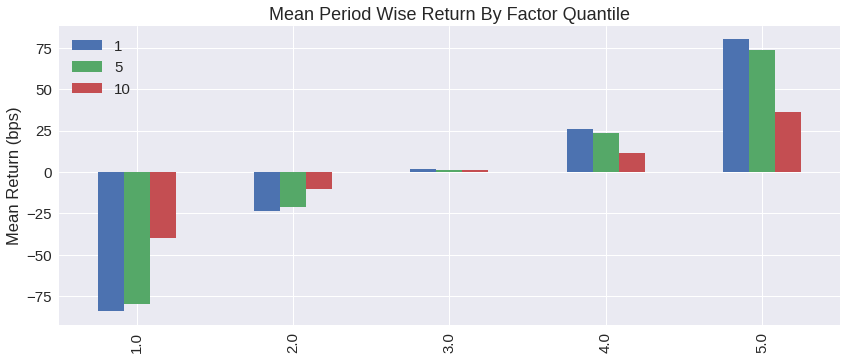

In [61]:
alphalens.tears.create_summary_tear_sheet(factor_data)

# The Whole Thing

If you want to see all of the results create a full tear sheet. By passing in the factor data you can analyze all of the above statistics and plots at once.

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1.0             -0.411371  0.014925 -0.036896  0.029091  20147  20.086740
2.0             -0.042042  0.023551 -0.008346  0.009758  20004  19.944167
3.0             -0.028777  0.037272  0.003054  0.009076  20031  19.971087
4.0             -0.015974  0.056112  0.014022  0.009921  20002  19.942173
5.0             -0.006261  1.068796  0.039773  0.031170  20116  20.055833

Returns Analysis


1        5       10
Ann. alpha                                      10.216    8.218   2.064
beta                                             0.225    0.233   0.004
Mean Period Wise Return Top Quantile (bps)      80.074   73.827  36.090
Mean Period Wise Return Bottom Quantile (bps)  -84.084  -79.668 -39.762
Mean Period Wise Spread (bps)                  165.123  151.935  75.050

Information Analysis


1             5       10
IC Mean            0.419  1.000000e+00   0.653
IC Std.            0.182  0.000000e+00   0.187
Risk-Adjusted IC   2.297  9.507975e+15   3.483
t-stat(IC)        35.218  1.457545e+17  53.386
p-value(IC)        0.000  0.000000e+00   0.000
IC Skew           -2.252 -1.844000e+00  -5.877
IC Kurtosis       18.210  6.130000e-01  49.353

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.376  0.775  0.765
Quantile 2 Mean Turnover   0.611  0.802  0.799
Quantile 3 Mean Turnover   0.651  0.780  0.787
Quantile 4 Mean Turnover   0.613  0.787  0.792
Quantile 5 Mean Turnover   0.400  0.804  0.793

1      5     10
Mean Factor Rank Autocorrelation  0.74 -0.018  0.001

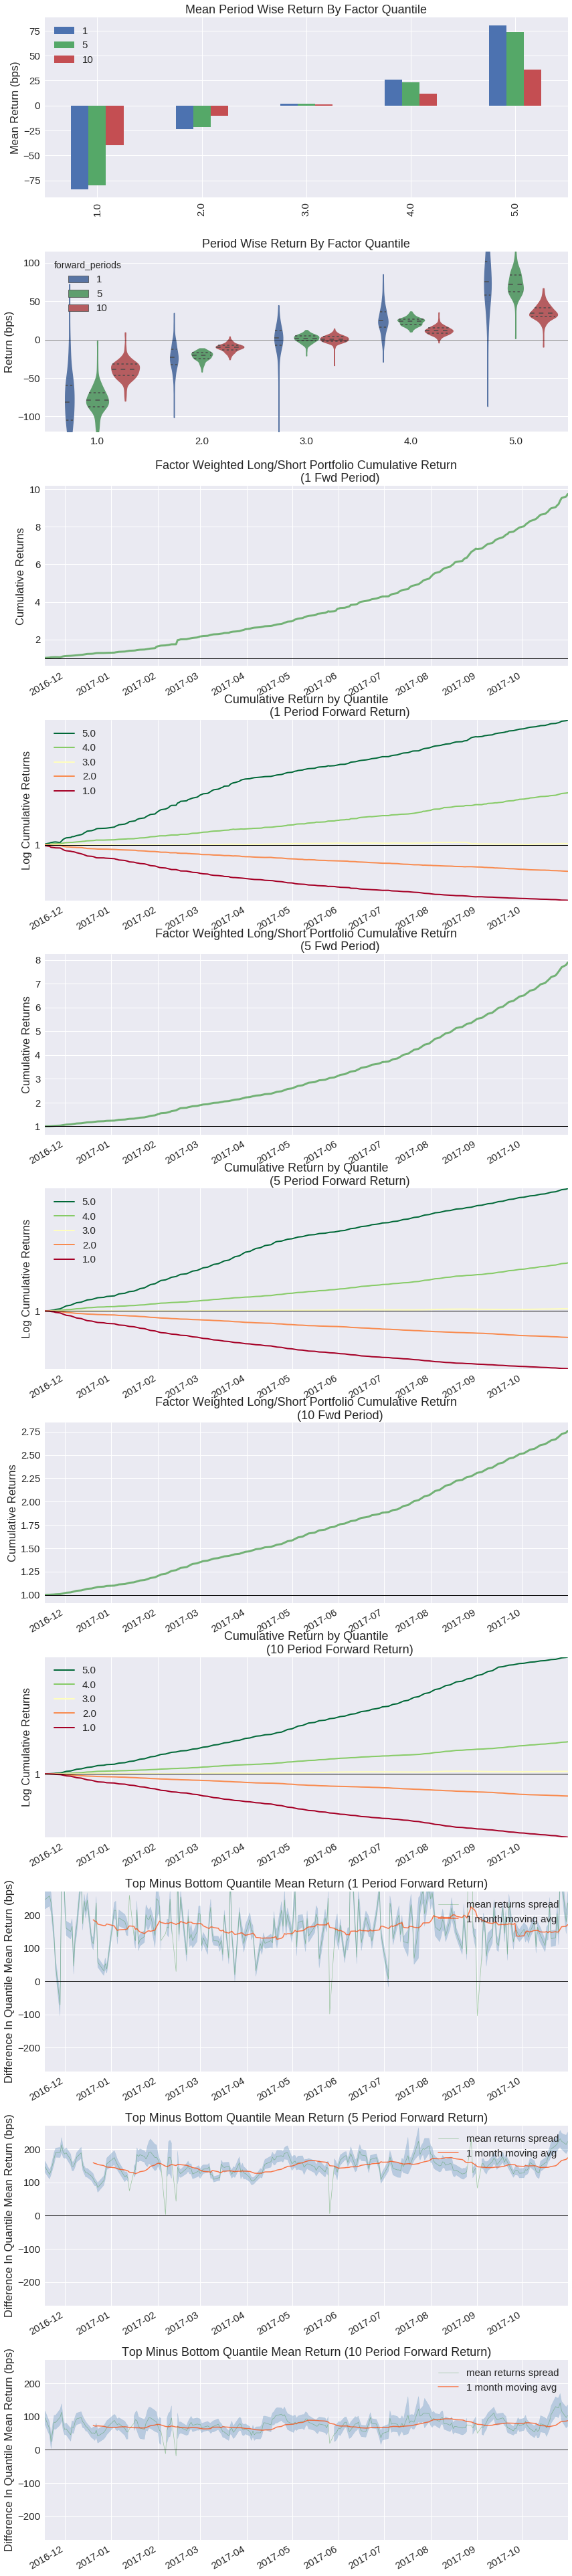

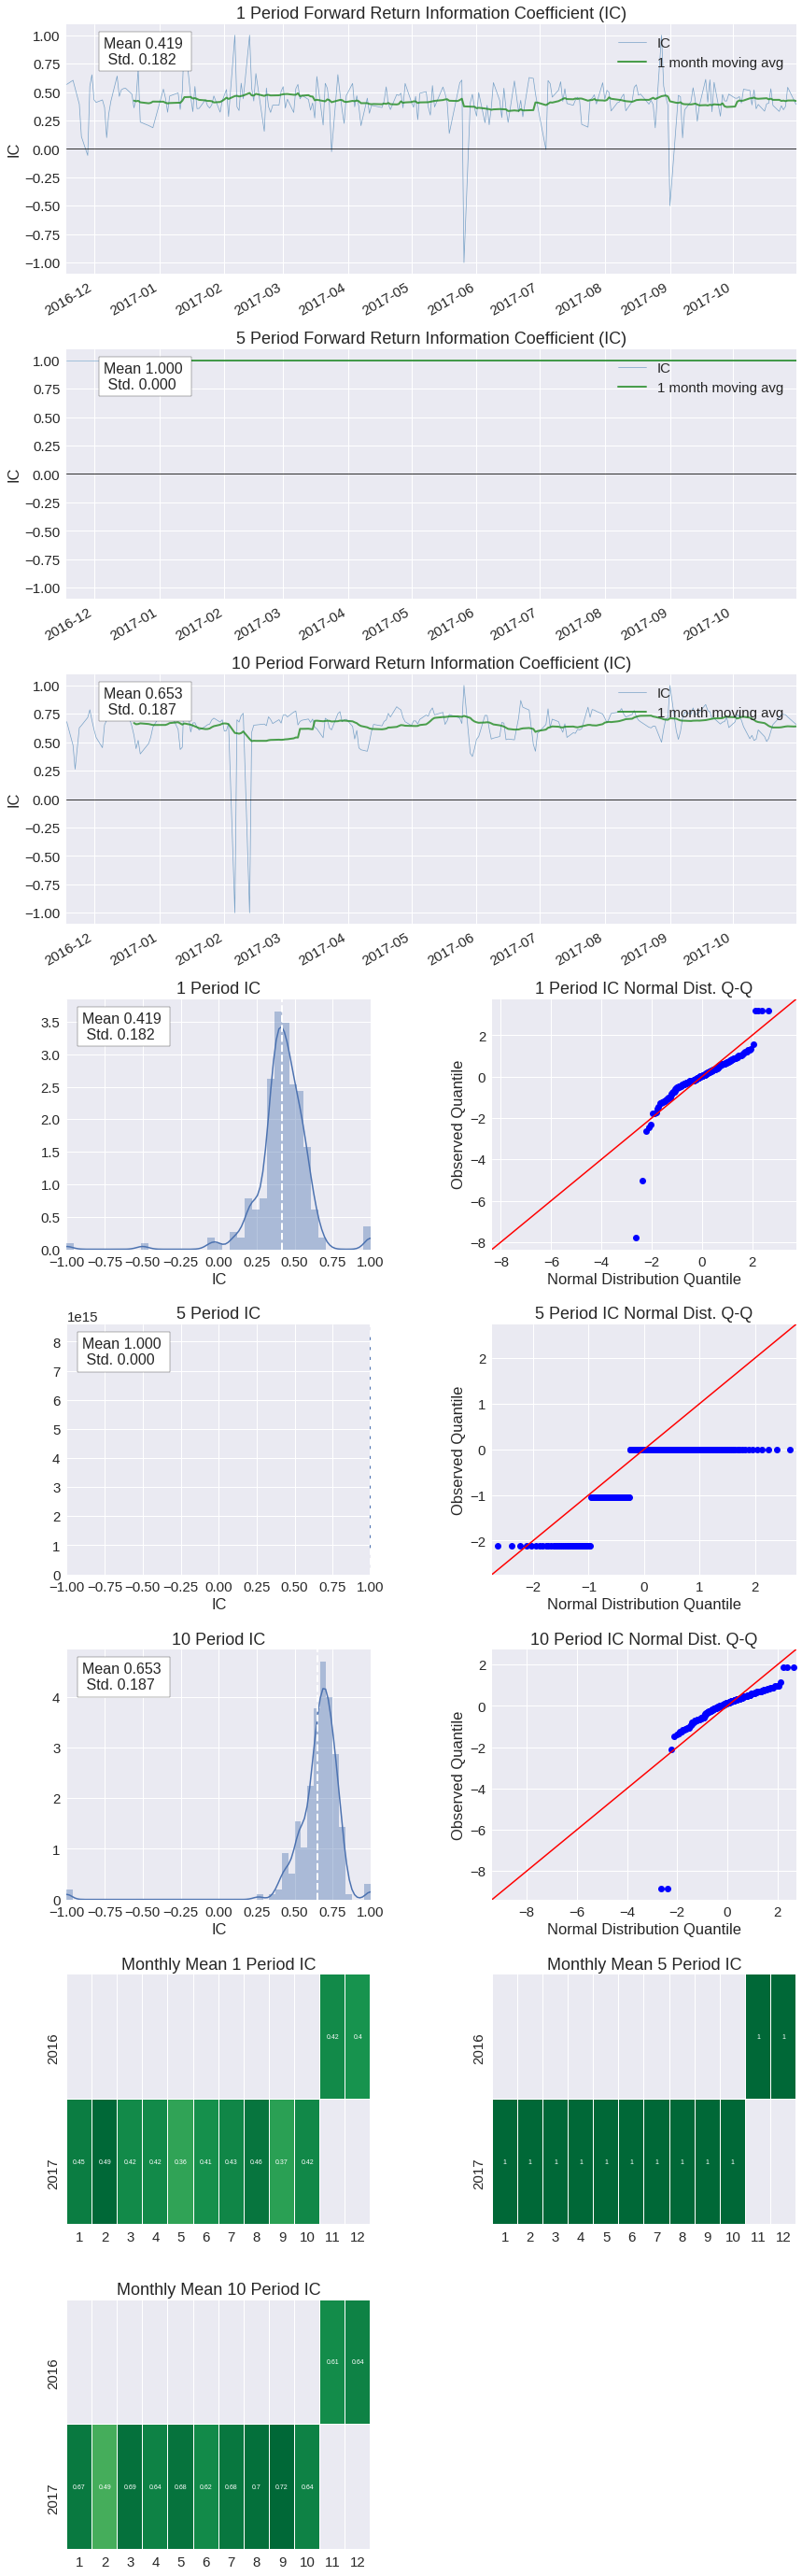

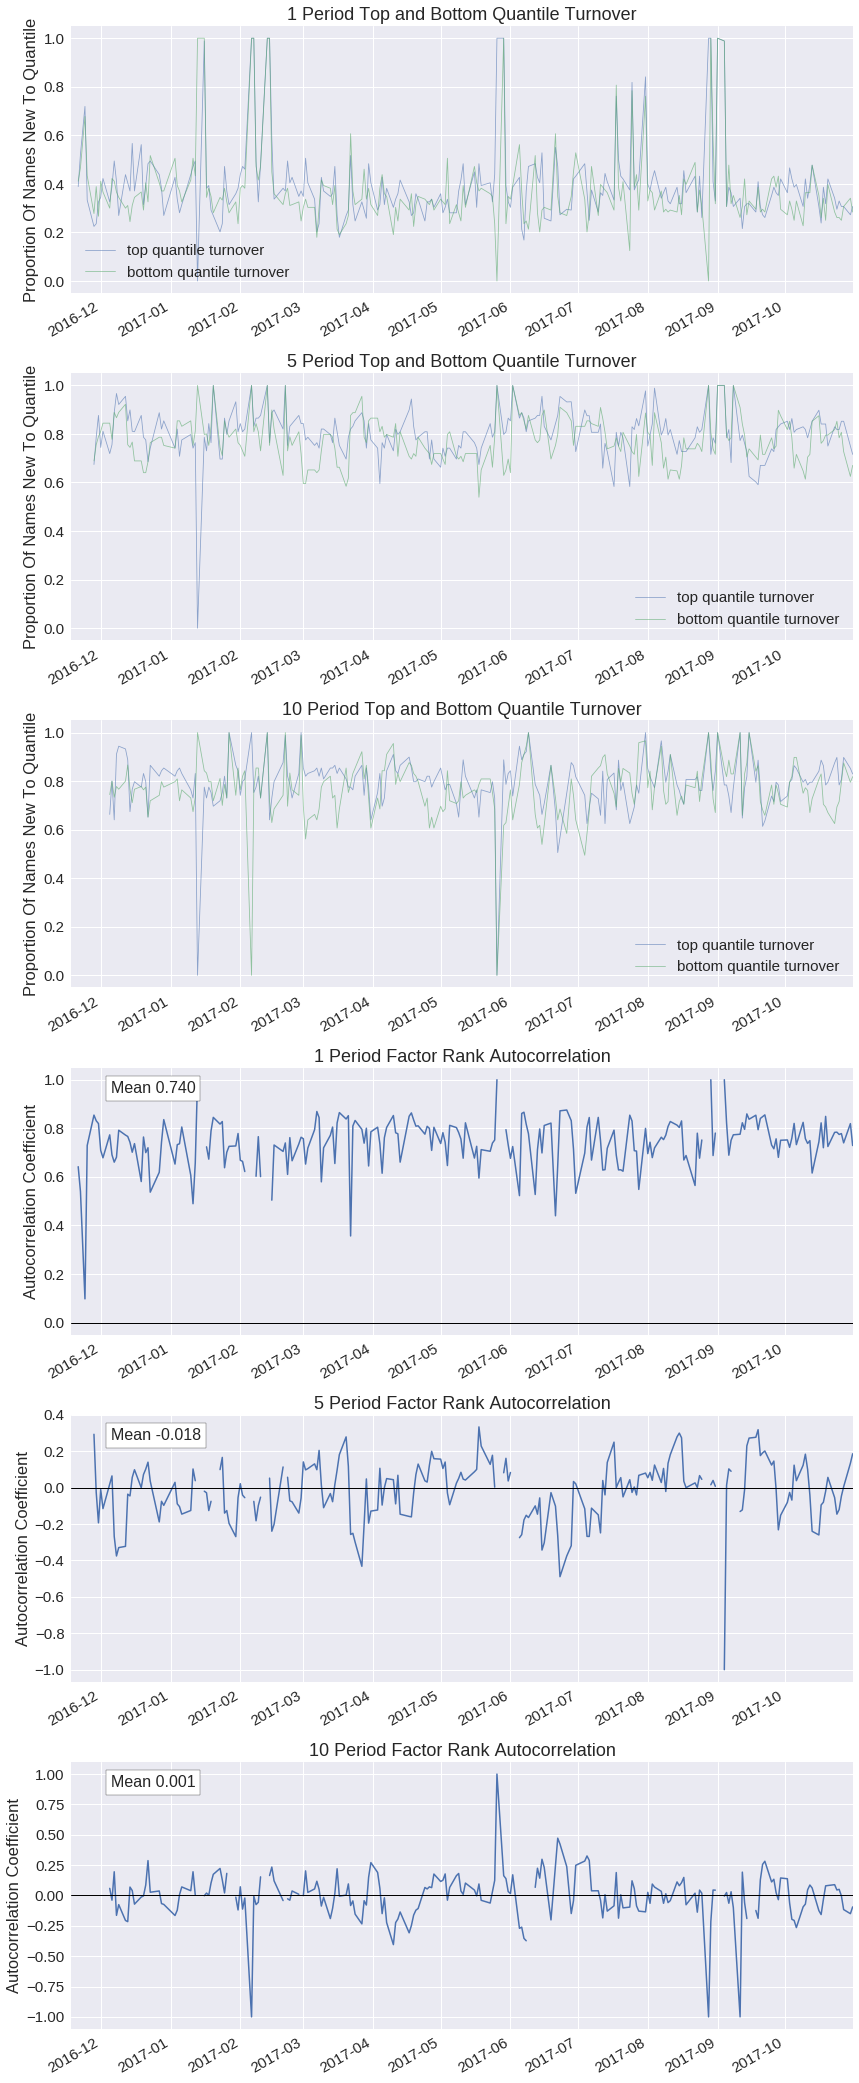

In [62]:
alphalens.tears.create_full_tear_sheet(factor_data)